In [3]:
# Step 1: Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
import cv2
import os
from google.colab import files

In [4]:
# Step 2: Load and Preprocess the Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
# Step 3: Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [7]:
# Step 4: Compile and Train the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_split=0.2, verbose=1)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.5289 - loss: 1.3042 - val_accuracy: 0.5636 - val_loss: 1.2272
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 81ms/step - accuracy: 0.5938 - loss: 1.1535 - val_accuracy: 0.6055 - val_loss: 1.1216
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.6233 - loss: 1.0702 - val_accuracy: 0.6270 - val_loss: 1.0516
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 83ms/step - accuracy: 0.6520 - loss: 0.9904 - val_accuracy: 0.6485 - val_loss: 1.0039
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 85ms/step - accuracy: 0.6804 - loss: 0.9149 - val_accuracy: 0.6646 - val_loss: 0.9543
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 82ms/step - accuracy: 0.6940 - loss: 0.8720 - val_accuracy: 0.6746 - val_loss: 0.9490
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.7144 - loss: 0.8232 - val_accuracy: 0.6772 - val_loss: 0.9376
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.7265 - loss: 0.7795 - 

In [10]:
# Step 5: Evaluate and Save the Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# Save the trained model
model.save("/content/cifar10_cnn_model.h5")
print("💾 Model saved as 'cifar10_cnn_model.h5'")


313/313 - 4s - 11ms/step - accuracy: 0.6791 - loss: 0.9431



✅ Test Accuracy: 0.6791
💾 Model saved as 'cifar10_cnn_model.h5'


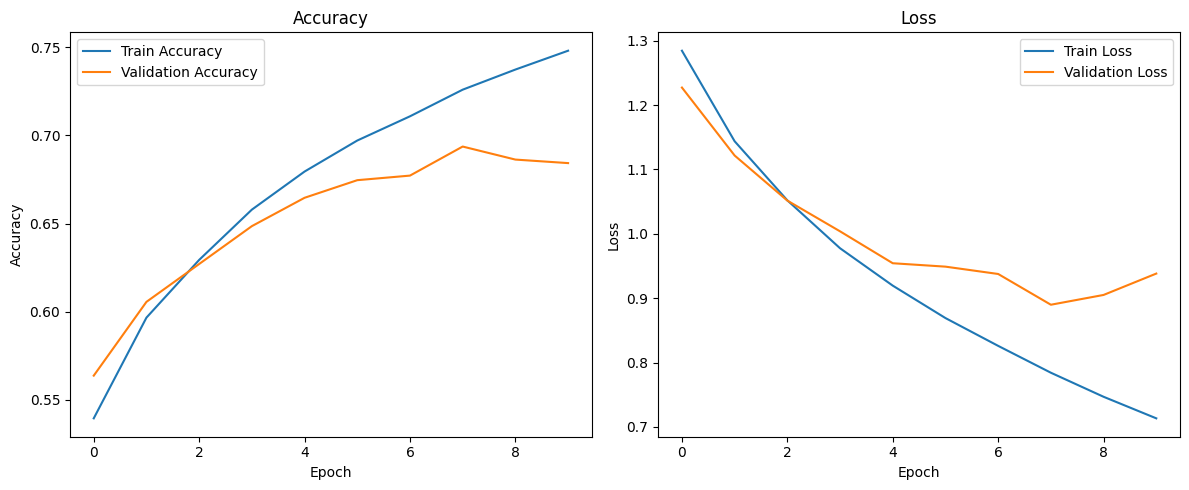

In [11]:
# Step 6: Visualize Training History
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Saving frog.jpg to frog.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step

🖼️ Predicted Class: frog (99.40%)


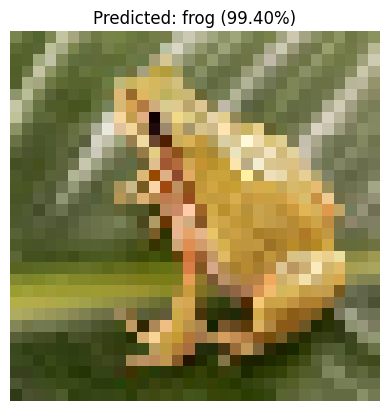

In [18]:
# Step 8: Upload and Classify a New Image

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files  # For Colab

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Function to load model and classify image
def classify_uploaded_image(model_path="/content/cifar10_cnn_model.h5"):
    # Upload a new image
    uploaded = files.upload()
    for filename in uploaded.keys():
        # Load and preprocess the image
        img = load_img(filename, target_size=(32, 32))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Load the saved model
        model = load_model(model_path)

        # Predict
        prediction = model.predict(img_array)
        class_index = np.argmax(prediction)
        confidence = np.max(prediction)

        # Display result
        print(f"\n🖼️ Predicted Class: {class_names[class_index]} ({confidence*100:.2f}%)")
        plt.imshow(img)
        plt.title(f"Predicted: {class_names[class_index]} ({confidence*100:.2f}%)")
        plt.axis('off')
        plt.show()

# Call the function
classify_uploaded_image()
